In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd




In [5]:
df = pd.read_csv('data/cens.csv', sep = ";")  # Replace 'data.csv' with your actual data file

C:\Users\ferna\AppData\Local\Temp\ipykernel_24548\3258218256.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/cens.csv', sep = ";")  # Replace 'data.csv' with your actual data file


In [6]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290088 entries, 0 to 290087
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   any       290088 non-null  int64  
 1   geo       290088 non-null  object 
 2   municipi  290088 non-null  object 
 3   edat      290088 non-null  object 
 4   sexe      290088 non-null  object 
 5   concepte  290088 non-null  object 
 6   estat     0 non-null       float64
 7   valor     290088 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 17.7+ MB


In [10]:
df["valor"] = pd.to_numeric(df["valor"], errors="coerce")
# Eliminar las filas donde el municipio sea 'Catalunya'
df = df[df["municipi"] != "Catalunya"]


In [11]:
df_poblacio = df[df["concepte"] == "població"]


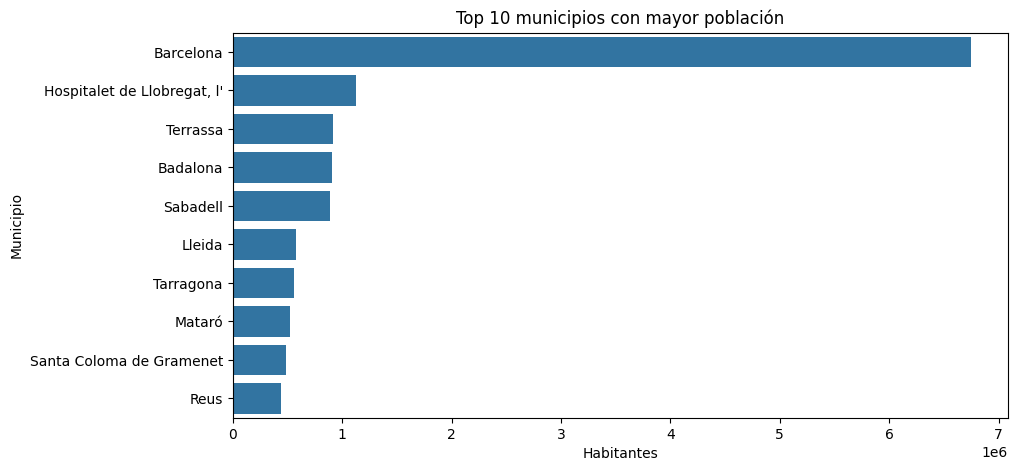

In [12]:
df_municipis = (
    df_poblacio.groupby("municipi")["valor"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=df_municipis.values, y=df_municipis.index)
plt.title("Top 10 municipios con mayor población")
plt.xlabel("Habitantes")
plt.ylabel("Municipio")
plt.show()
